In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('prices.csv')

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.describe(include='all')

,date,symbol,open,close,low,high,volume
count,851264,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,3524,501,NaN,NaN,NaN,NaN,NaN
top,2016-12-30,KSU,NaN,NaN,NaN,NaN,NaN
freq,498,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,NaN,NaN,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,NaN,NaN,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,NaN,NaN,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,NaN,NaN,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,NaN,NaN,79.879997,79.889999,79.110001,80.610001,5.222500e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [6]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [7]:
df.shape

(851264, 7)

In [8]:
df1=df.drop(['date','symbol'], axis=1)
df1

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000,973800.0
851260,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,44.730000,45.450001,44.410000,45.590000,1380900.0


In [9]:
df1.dtypes

open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [10]:
x = df1.drop(['close'] ,axis=1)
y = df1['close']


In [11]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


In [12]:
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

In [13]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
y_pred=model.predict(x_test)


In [15]:
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
rmse,mae,r2

(163.45847449278332, 1.4189396037516029, 0.9765833533368274)

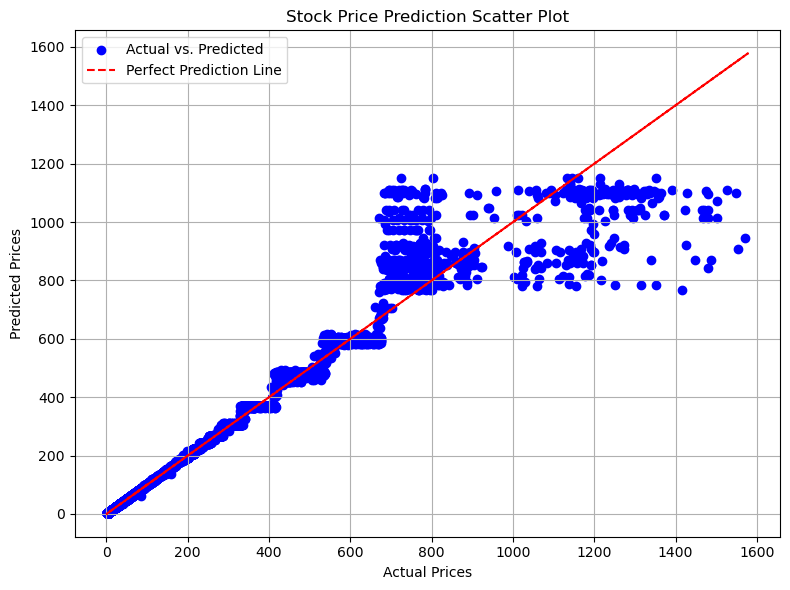

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(df1['close'], df1['close'], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Stock Price Prediction Scatter Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()